# Gardening-robot

## Criando um Robô Jardineiro 

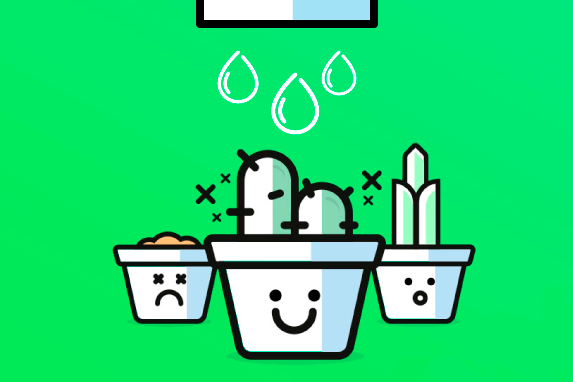

In [2]:
from IPython.display import Image
Image("p.png")

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline


Bad key "ytick.alignment" on line 268 in
/usr/share/matplotlib/mpl-data/stylelib/classic.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution

Bad key "xtick.alignment" on line 250 in
/usr/share/matplotlib/mpl-data/stylelib/classic.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


### Explorando dados

In [4]:
df = pd.read_csv('plantacao.csv')

In [5]:
df.columns

Index([u'ID', u' MES', u' DIA', u' Hora', u' umidade '], dtype='object')

In [6]:
df

,ID,MES,DIA,Hora,umidade
0,1,1,6,18,17
1,1,1,10,12,19
2,1,1,19,5,8
3,1,1,23,9,12
4,1,1,4,16,13
5,1,1,2,2,5
6,1,1,22,14,15
7,1,1,20,14,18
8,1,1,23,14,24
9,1,1,22,20,1


### Pre-processando dados

In [7]:
df.describe() 

,ID,MES,DIA,Hora,umidade
count,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000
mean,2.893872,1.000632,11.250158,11.396083,59.190145
std,1.053010,0.025134,6.924048,7.040458,26.991451
min,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,5.000000,5.000000,40.000000
50%,3.000000,1.000000,11.000000,12.000000,64.000000
75%,4.000000,1.000000,17.000000,18.000000,82.000000
max,4.000000,2.000000,23.000000,23.000000,99.000000


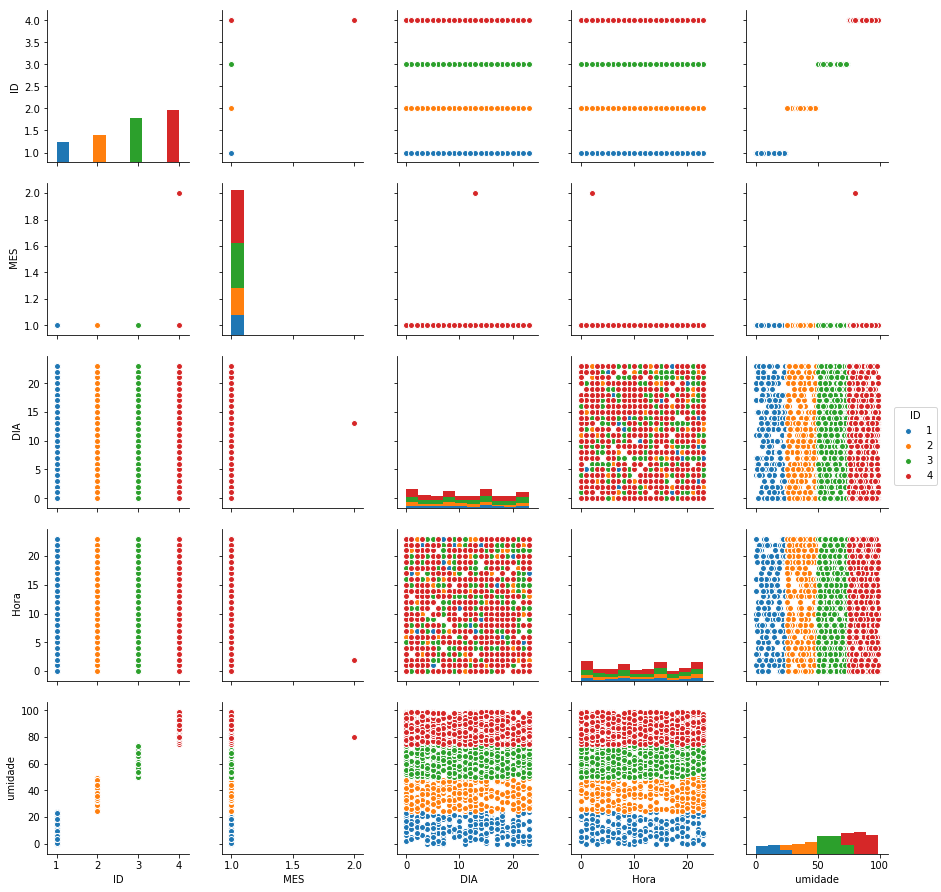

In [8]:
#sb.pairplot(df, hue='ID')
sb.pairplot(df,hue='ID')

In [49]:
import matplotlib.pyplot as plt

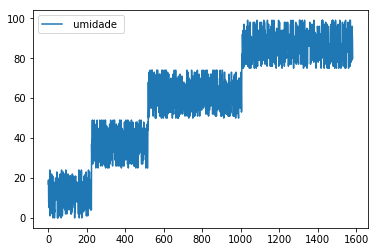

In [80]:
umidade = df[df.columns[4:]] 
umidade.plot()


## Criando Variavel de Treino

In [9]:
#print df.drop('ID',axis = 1)
X = np.array(df.drop('ID',axis = 1))
X

array([[ 1,  6, 18, 17],
       [ 1, 10, 12, 19],
       [ 1, 19,  5,  8],
       ...,
       [ 1, 17, 18, 93],
       [ 1, 18, 15, 89],
       [ 2, 13,  2, 80]])

## Criando Variavel de Test

In [10]:
y = np.array(df["ID"])
y

array([1, 1, 1, ..., 4, 4, 4])

## Classificando com KNN 
#### Aqui basicamente vamos pegar nossas variaveis de treino e test e vamos aplicar no classificador que irá aprender de acordo com os dados que colocamos como entrada

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
knn = KNeighborsClassifier(n_neighbors=4)

In [32]:
#print X
#print y
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

## Fazendo uma Predição com dados novos de outro sensor

In [14]:
def predicao(lista):
 nivel =  knn.predict([lista])
 if nivel[0] == 1: return "arido"
 if nivel[0] == 2: return "seco"
 if nivel[0] == 3: return "umido"
 if nivel[0] == 4: return "molhado"

In [15]:
MES = raw_input("MES: ")
DIA = raw_input("DIA: ")
Hora = raw_input("Hora: ")
umidade = raw_input("umidade ")
lista = [MES,DIA, Hora, umidade]
pred = predicao(lista)
print pred

MES: 2
DIA: 2
Hora: 15
umidade 75
molhado


## Metricas de Avaliação

In [46]:
from sklearn.metrics import accuracy_score

### Accuracy com Score

In [43]:
y_pred_val = knn.predict(X)

precisao =  float(accuracy_score(y, y_pred_val))* 100
print  precisao

98.4207201516


### Cross Validation 

In [45]:
from sklearn.cross_validation import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [48]:
print X_train

[[ 1 16 13 24]
 [ 1  0 11  7]
 [ 1  2  6 92]
 ...
 [ 1 19 22 60]
 [ 1  8 21 75]
 [ 1 20  7 94]]
